In [1]:
# 1.Importing all the libraries

import numpy as np 
import csv
import pandas as pd 
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import randint
import math 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# preperation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score


# models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier





# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking classifier
from mlxtend.classifier import StackingClassifier

#For Paired T-Test
from mlxtend.evaluate import paired_ttest_kfold_cv 


In [2]:
def correlationCoefficient(X, Y, n) : 
    sum_X = 0.0
    sum_Y = 0.0
    sum_XY = 0.0
    squareSum_X = 0.0
    squareSum_Y = 0.0
      
      
    i = 0
    while i < n : 
        # sum of elements of array X. 
        sum_X = sum_X + X[i] 
          
        # sum of elements of array Y. 
        sum_Y = sum_Y + Y[i] 
          
        # sum of X[i] * Y[i]. 
        sum_XY = sum_XY + X[i] * Y[i] 
          
        # sum of square of array elements. 
        squareSum_X = squareSum_X + X[i] * X[i] 
        squareSum_Y = squareSum_Y + Y[i] * Y[i] 
          
        i = i + 1
       
    # use formula for calculating correlation  
    # coefficient. 
    corr = (float)(n * sum_XY - sum_X * sum_Y)/(float)(math.sqrt((n * squareSum_X - sum_X * sum_X)* (n * squareSum_Y - 
           sum_Y * sum_Y))) 
    return corr 
      

  



In [3]:
#2.Reading data from a file path

path = 'D:/study/uottawa/winter 2019/Machine Learning/project/train_data.csv'
data_df = pd.read_csv(path)


#Pandas: whats the data row count?
print(data_df.shape)
    
#Pandas: whats the distribution of the data?
print(data_df.describe())
    
#Pandas: What types of data do i have?
print(data_df.info())

print(data_df.columns)

(21263, 82)
       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%   

In [4]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['number_of_elements' , 'range_atomic_radius' ,'range_Valence']

floatFeatures = ['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
        'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence',
       'critical_temp']




stringFeatures = []

# Clean the NaN's
for feature in data_df:
    if feature in intFeatures:
        data_df[feature] = data_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data_df[feature] = data_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data_df[feature] = data_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
        
data_df[data_df==np.inf]=0.0
data_df.fillna(data_df.mean(), inplace=True)
data_df.head(20)   



,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [5]:
#3. missing data
total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                              Total  Percent
critical_temp                     0      0.0
wtd_std_fie                       0      0.0
wtd_mean_atomic_radius            0      0.0
gmean_atomic_radius               0      0.0
wtd_gmean_atomic_radius           0      0.0
entropy_atomic_radius             0      0.0
wtd_entropy_atomic_radius         0      0.0
range_atomic_radius               0      0.0
wtd_range_atomic_radius           0      0.0
std_atomic_radius                 0      0.0
wtd_std_atomic_radius             0      0.0
mean_Density                      0      0.0
wtd_mean_Density                  0      0.0
gmean_Density                     0      0.0
wtd_gmean_Density                 0      0.0
entropy_Density                   0      0.0
wtd_entropy_Density               0      0.0
range_Density                     0      0.0
wtd_range_Density                 0      0.0
mean_atomic_radius                0      0.0
std_fie                           0      0.0
wtd_std_Va

In [6]:
scaler = MinMaxScaler(feature_range=(0.1, 1), copy=False)
scaled_data=scaler.fit(data_df)
print(scaled_data)
transformed_data=scaler.transform(data_df)
transformed_data1=np.delete(transformed_data,np.s_[-1],axis=1)
print(transformed_data1)
y = np.array(transformed_data[:,-1])

MinMaxScaler(copy=False, feature_range=(0.1, 1))
[[0.4375     0.46529073 0.32855457 ... 0.23974756 0.22990381 0.23111764]
 [0.55       0.48215018 0.33146808 ... 0.24526391 0.28973666 0.24058188]
 [0.4375     0.46529073 0.32865476 ... 0.24342512 0.22990381 0.23340899]
 ...
 [0.2125     0.51303811 0.49626923 ... 0.51188753 0.25       0.22      ]
 [0.2125     0.51303811 0.50287404 ... 0.38445983 0.25       0.23874797]
 [0.325      0.45871518 0.4573886  ... 0.33168674 0.52426407 0.55      ]]


C:\Users\reshm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
print(y)
np.savetxt("y.csv", y, delimiter=",")

[0.24108022 0.22648561 0.19243152 ... 0.10963142 0.10895034 0.16226932]


[[-0.69060322  1.24583654]
 [-0.86725618  0.63734016]
 [-0.65926725  1.29675377]
 ...
 [ 1.81390924  0.36235288]
 [ 1.7248927   0.16839034]
 [ 0.95314268 -0.4249634 ]]


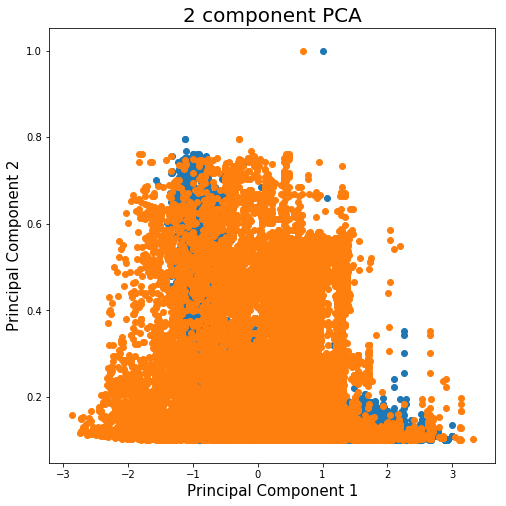

In [8]:

# feature extraction

pca = PCA(n_components=2, whiten=True).fit(transformed_data1)
new_data = pca.transform(transformed_data1)
print(new_data)

# PCA scatter plot


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(new_data[:, 0] ,y)    
ax.scatter(new_data[:, 1] ,y)

In [9]:
type(new_data)

numpy.ndarray

In [10]:
new_data.shape

(21263, 2)

In [16]:
new_data1=pd.DataFrame(new_data,y)
print(new_data1.head(5))
outfile = open("./PCA.csv", "w")
writer = csv.writer(outfile)
writer.writerow([ "Critical Temperature","PCA1 ", "PCA2 "])
writer.writerows(y)

                 0         1
0.241080 -0.690603  1.245837
0.226486 -0.867256  0.637340
0.192432 -0.659267  1.296754
0.207026 -0.675892  1.269333
0.211891 -0.715901  1.207318


Error: iterable expected, not numpy.float64

In [12]:
np.savetxt("new_PCA.csv", new_data, delimiter=",")

In [8]:
pca.explained_variance_ratio_

array([0.49503401, 0.10545736])

In [19]:

# K-fold split

kfold=KFold(n_splits=10 ,shuffle=False, random_state=10)
for train_index, test_index in kfold.split(new_data):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = new_data[train_index], new_data[test_index] 
    y_train, y_test = y[train_index], y[test_index]

Train: [ 2127  2128  2129 ... 21260 21261 21262] Validation: [   0    1    2 ... 2124 2125 2126]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [2127 2128 2129 ... 4251 4252 4253]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [4254 4255 4256 ... 6378 6379 6380]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [6381 6382 6383 ... 8504 8505 8506]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [ 8507  8508  8509 ... 10630 10631 10632]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [10633 10634 10635 ... 12756 12757 12758]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [12759 12760 12761 ... 14882 14883 14884]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [14885 14886 14887 ... 17008 17009 17010]
Train: [    0     1     2 ... 21260 21261 21262] Validation: [17011 17012 17013 ... 19134 19135 19136]
Train: [    0     1     2 ... 19134 19135 19136] Validation: [19137 19138 19139 ... 21260 21261 2

Mean Absolute Error: 0.06976674392495671
Root Mean Squared Error: 0.08982057555992691
variance: 0.1932114023049606
correlation coefficient 0.5019675715093613
      Actual  Predicted
0   0.150107   0.183047
1   0.124129   0.267097
2   0.172972   0.270794
3   0.176864   0.278796
4   0.265405   0.369418
5   0.136972   0.183047
6   0.247405   0.220214
7   0.160810   0.162899
8   0.126610   0.121308
9   0.128167   0.136712
10  0.127826   0.137287
11  0.127048   0.137724
12  0.125734   0.138050
13  0.124810   0.138279
14  0.124177   0.138420
15  0.150594   0.158158
16  0.154486   0.158158
17  0.128799   0.131856
18  0.123885   0.132296
19  0.115129   0.133196


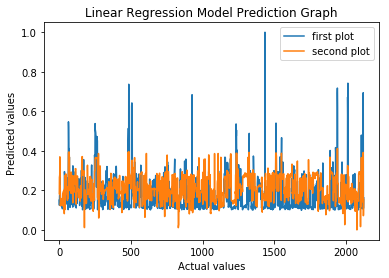

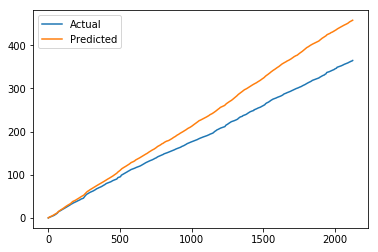

In [20]:
# Linear Regression Model

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
MAE_LR=metrics.mean_absolute_error(y_test, y_pred) 
SQRT_LR=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
VARIENCE_LR=explained_variance_score(y_test, y_pred)
CC_LR=correlationCoefficient(y_test, y_pred,len(y_test) )

print('Mean Absolute Error:', MAE_LR)  
print('Root Mean Squared Error:',SQRT_LR )
print ('variance:',VARIENCE_LR)
print ('correlation coefficient',CC_LR)

# visulizing distance

b1 = y_test.ravel()
c1 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b1, 'Predicted': c1})   
print(df.head(20)) 


# Plotting graph


plt.plot(y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Linear Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()

# Graph 

df = df.cumsum();
df.plot();


Mean Absolute Error: 0.037071282145445264
Root Mean Squared Error: 0.062119061847020235
variance: 0.4966164263385605
correlation coefficient 0.7114581454156084
      Actual  Predicted
0   0.150107   0.142868
1   0.124129   0.132740
2   0.172972   0.172486
3   0.176864   0.177837
4   0.265405   0.279999
5   0.136972   0.142868
6   0.247405   0.123835
7   0.160810   0.161851
8   0.126610   0.125783
9   0.128167   0.140773
10  0.127826   0.133151
11  0.127048   0.136797
12  0.125734   0.177331
13  0.124810   0.178083
14  0.124177   0.168864
15  0.150594   0.144597
16  0.154486   0.144597
17  0.128799   0.129188
18  0.123885   0.120673
19  0.115129   0.115348


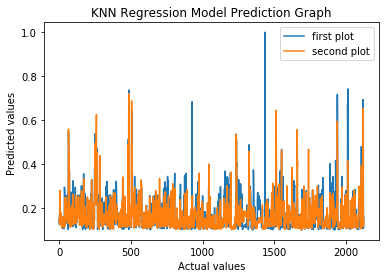

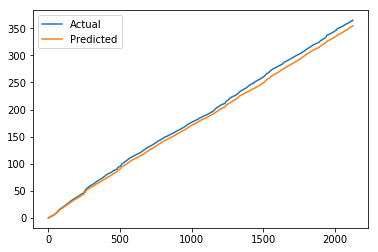

In [21]:
# Knearest Neibhours

n_neighbors = 5

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

MAE_KNN=metrics.mean_absolute_error(y_test, y_pred) 
SQRT_KNN=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
VARIENCE_KNN=explained_variance_score(y_test, y_pred)
CC_KNN=correlationCoefficient(y_test, y_pred,len(y_test) )

print('Mean Absolute Error:', MAE_KNN)  
print('Root Mean Squared Error:',SQRT_KNN)
print ('variance:',VARIENCE_KNN)
print ('correlation coefficient',CC_KNN)

# visulizing distance

b2 = y_test.ravel()
c2 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b2, 'Predicted': c2})   
print(df.head(20)) 

# Plotting graph

plt.plot(y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("KNN Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()

# Graph 

df = df.cumsum();
df.plot();


Mean Absolute Error: 0.04379069578157946
Root Mean Squared Error: 0.07572048278051656
variance: 0.2502601948201454
correlation coefficient 0.6104841860651335
      Actual  Predicted
0   0.150107   0.140934
1   0.124129   0.132740
2   0.172972   0.172486
3   0.176864   0.177837
4   0.265405   0.279999
5   0.136972   0.140934
6   0.247405   0.123934
7   0.160810   0.163360
8   0.126610   0.125945
9   0.128167   0.140134
10  0.127826   0.179783
11  0.127048   0.187080
12  0.125734   0.159107
13  0.124810   0.115080
14  0.124177   0.109437
15  0.150594   0.150594
16  0.154486   0.150594
17  0.128799   0.129188
18  0.123885   0.131134
19  0.115129   0.115348


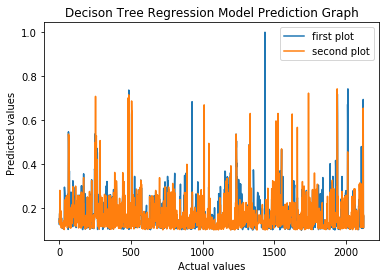

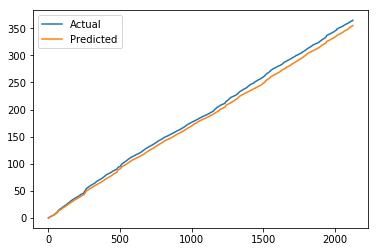

In [22]:
#Decision tree model

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

MAE_DT=metrics.mean_absolute_error(y_test, y_pred) 
SQRT_DT=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
VARIENCE_DT=explained_variance_score(y_test, y_pred)
CC_DT=correlationCoefficient(y_test, y_pred,len(y_test) )

print('Mean Absolute Error:', MAE_DT)  
print('Root Mean Squared Error:',SQRT_DT )
print ('variance:',VARIENCE_DT)
print ('correlation coefficient',CC_DT)

# visulizing distance

b3 = y_test.ravel()
c3 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b3, 'Predicted': c3})   
print(df.head(20))

# Plotting Graph

plt.plot(y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Decison Tree Regression Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()

# Graph 

df = df.cumsum();
df.plot();


Mean Absolute Error: 0.04230806447868004
Root Mean Squared Error: 0.06501174429397404
variance: 0.44881040573499675
correlation coefficient 0.6792804143729967
      Actual  Predicted
0   0.150107   0.143531
1   0.124129   0.181780
2   0.172972   0.190343
3   0.176864   0.186828
4   0.265405   0.163411
5   0.136972   0.143531
6   0.247405   0.154833
7   0.160810   0.141934
8   0.126610   0.130579
9   0.128167   0.134536
10  0.127826   0.142747
11  0.127048   0.126357
12  0.125734   0.134406
13  0.124810   0.138797
14  0.124177   0.127589
15  0.150594   0.149946
16  0.154486   0.149946
17  0.128799   0.166518
18  0.123885   0.133162
19  0.115129   0.137973


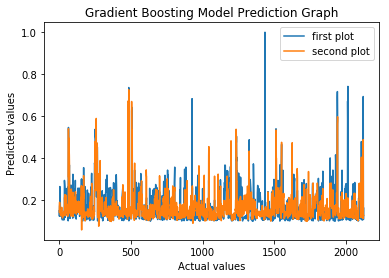

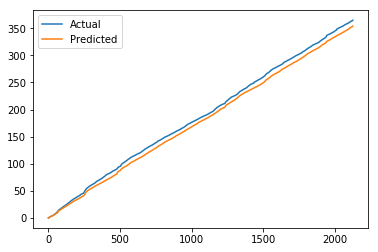

In [23]:
#Gradient Boosting algorithm

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X_train, y_train)

y_pred = GBoost.predict(X_test)

MAE_GB=metrics.mean_absolute_error(y_test, y_pred) 
SQRT_GB=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
VARIENCE_GB=explained_variance_score(y_test, y_pred)
CC_GB=correlationCoefficient(y_test, y_pred,len(y_test) )

print('Mean Absolute Error:', MAE_GB)   
print('Root Mean Squared Error:',SQRT_GB )
print ('variance:',VARIENCE_GB)
print ('correlation coefficient',CC_GB)
# visulizing distance

b4 = y_test.ravel()
c4 = y_pred.ravel()  

df = pd.DataFrame({'Actual': b4, 'Predicted': c4})   
print(df.head(20)) 

#Plotting Graph

plt.plot(y_test, label='first plot')
plt.plot(y_pred, label='second plot')
plt.title("Gradient Boosting Model Prediction Graph")
plt.xlabel("Actual values")
plt.ylabel("Predicted values ")
plt.legend()

# Graph 

df = df.cumsum();
df.plot();
